### OUTLIERS DETECTION & REMOVAL approaches
* Identifying outliers with visualization
*  Z-score method
* Interquartile Range Method( IQR ) method
* Compare Skewness

###  Import Data and Required Packages
**Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')


%matplotlib inline

In [30]:
df = pd.read_csv(r'google_missing_value_imputed2.csv')

In [31]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,size,day,month,year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,19.0,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,14.0,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,8.7,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,25.0,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,2.8,20,6,2018


In [32]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
size              0
day               0
month             0
year              0
dtype: int64

In [33]:
df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,size,day,month,year
9627,ai.type keyboard Plus + Emoji,TOOLS,4.5,57076,35000.0,100000,Paid,4.49,Everyone,Tools,2018-07-24,Paid-9.4.1.3,4.1 and up,35.0,24,7,2018
323,Manga Mania - Best online manga reader,COMICS,4.4,757,10000.0,10000,Free,0.00,Teen,Comics,2018-05-24,1.0,4.1 and up,10.0,24,5,2018
9666,4Eternity EO,BUSINESS,3.6,0,2000.0,10,Free,0.00,Everyone,Business,2018-01-17,1.2,4.1 and up,2.0,17,1,2018
3801,NPR News,NEWS_AND_MAGAZINES,4.0,24790,63000.0,1000000,Free,0.00,Everyone,News & Magazines,2018-07-20,Varies with device,Varies with device,6.0,20,7,2018
2896,GoPro (formerly Capture),PHOTOGRAPHY,4.0,157506,47000.0,10000000,Free,0.00,Everyone,Photography,2018-05-24,4.5.2,5.0 and up,47.0,24,5,2018


In [34]:
df.shape

(10839, 17)

In [35]:
num_fea = [col for col in df.columns if df[col].dtype!='O']
num_df = df[num_fea]
num_df.head()

,Rating,Reviews,Size,Installs,Price,size,day,month,year
0,4.1,159,19000.0,10000,0.0,19.0,7,1,2018
1,3.9,967,14000.0,500000,0.0,14.0,15,1,2018
2,4.7,87510,8700.0,5000000,0.0,8.7,1,8,2018
3,4.5,215644,25000.0,50000000,0.0,25.0,8,6,2018
4,4.3,967,2800.0,100000,0.0,2.8,20,6,2018


### 2 .  Z-score  method
#### Z-score:
- The number of standard deviations away from the mean that a particular observation is.
- A negative Z-score means an observation is below the mean.
- while a positive Z-score means means it above the mean.
- The further away from 0 the Z-Score is, the further away from the mean your observation is.

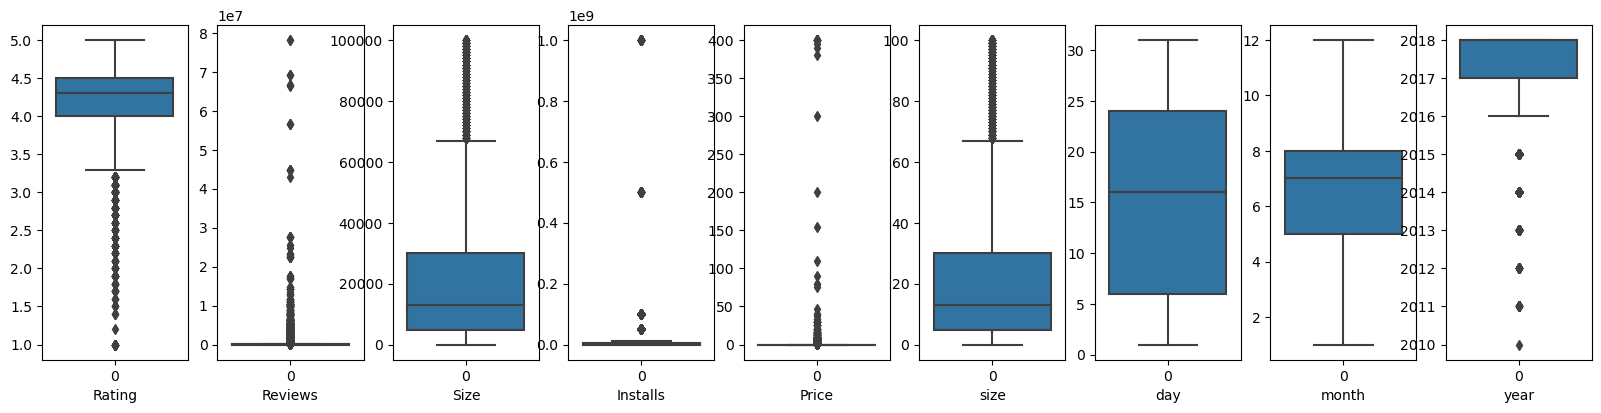

In [36]:
plt.figure(figsize=(20,20))
for i,col in enumerate(num_df.columns):
    plt.subplot(4,9,i+1)
    sns.boxplot(num_df[col])
    plt.xlabel(col)


#### Insights
- Except Day and month feature we have outliers in all other features

In [37]:
#  Function to detect outliers

def outlier_thresholds(dataframe, variable):
    quartile1= dataframe[variable].quantile(0.10)
    quartile3= dataframe[variable].quantile(0.90)
    interquantile_range = quartile3-quartile1
    up_limit = quartile3 + 1.5*interquantile_range
    low_limit = quartile1 - 1.5*interquantile_range
    print(low_limit, up_limit)

In [38]:
## function to remove outliers

def replace_with_thresholds(dataframe, numeric_columns):
    for variable in numeric_columns:
        if dataframe[variable].dtype !='O':
            low_limit, up_limit = outlier_thresholds(dataframe, variable)
            dataframe.loc[(dataframe[variable]<low_limit), variable] = low_limit
            dataframe.loc[(dataframe[variable]>up_limit), variable] = up_limit

In [15]:
replace_with_thresholds(num_df,num_df.columns)

1.95 6.3500000000000005


TypeError: cannot unpack non-iterable NoneType object

In [39]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
size              float64
day                 int64
month               int64
year                int64
dtype: object

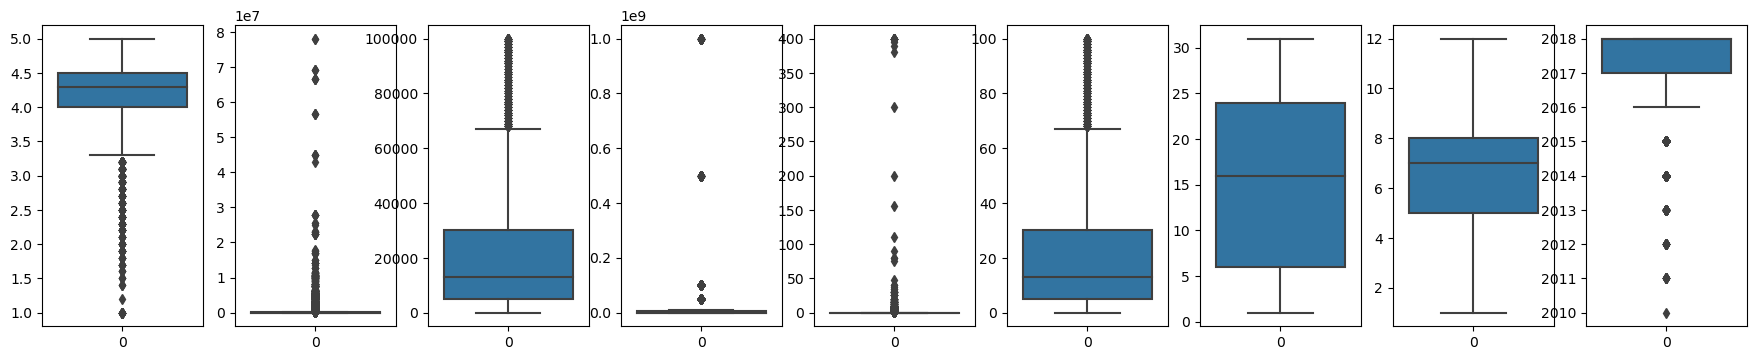

In [40]:
plt.figure(figsize= (22,18))
for i, col in enumerate(num_df.columns):
    plt.subplot(4,9,i+1)
    sns.boxplot(num_df[col])

### Interquartile Range Method(IQR) method

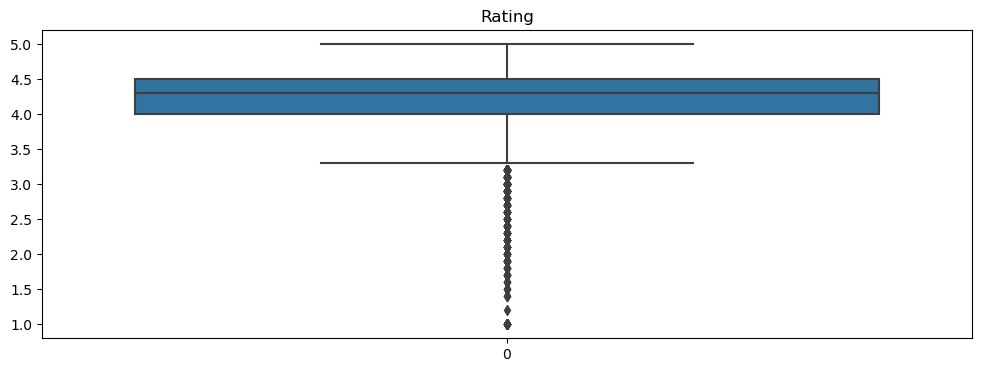

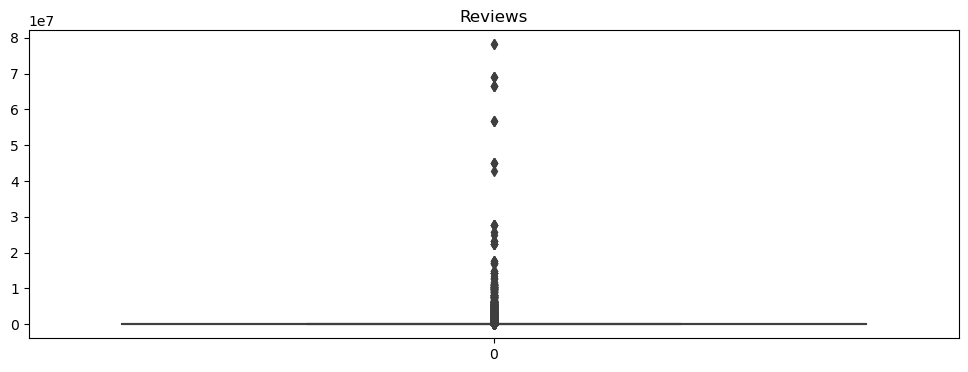

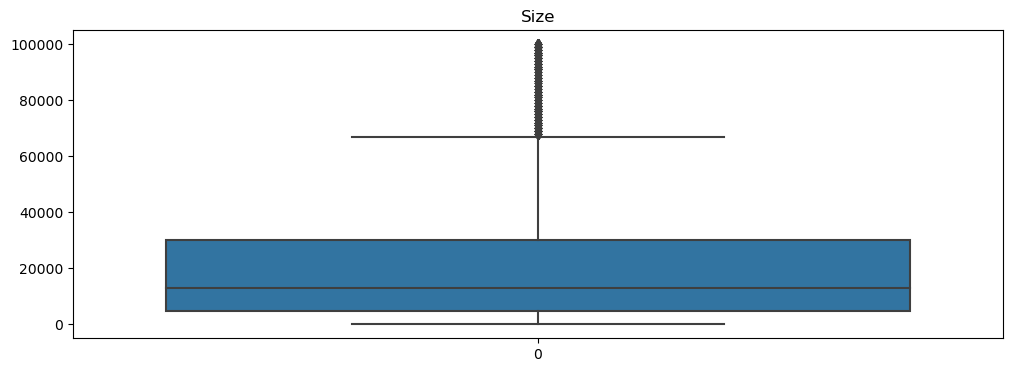

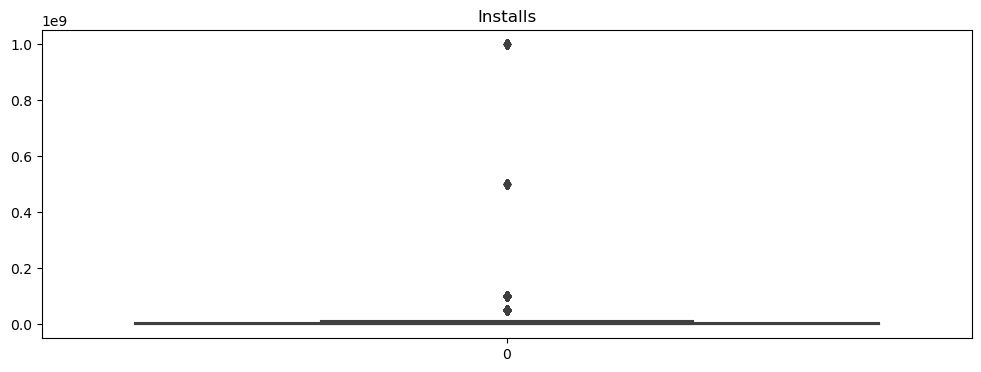

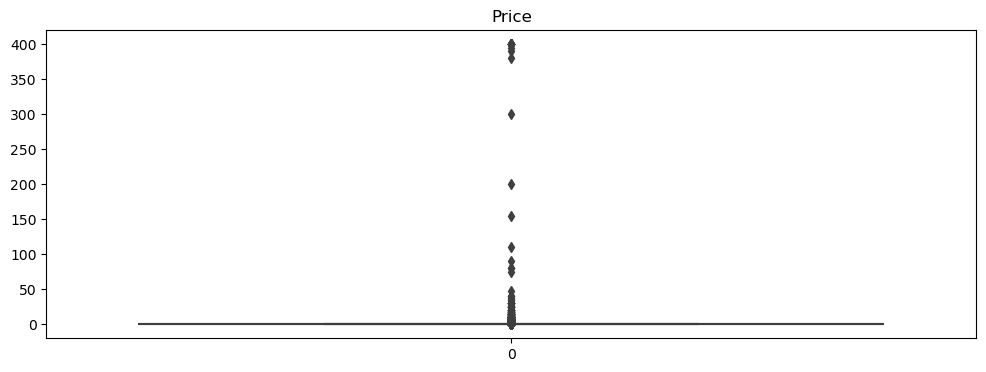

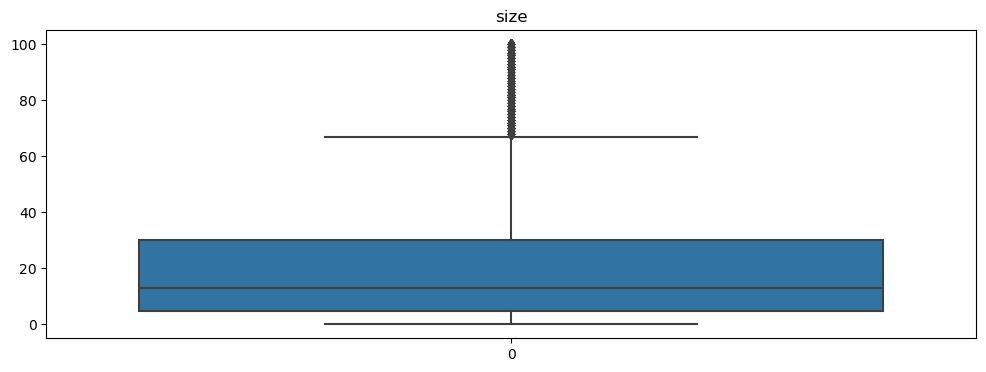

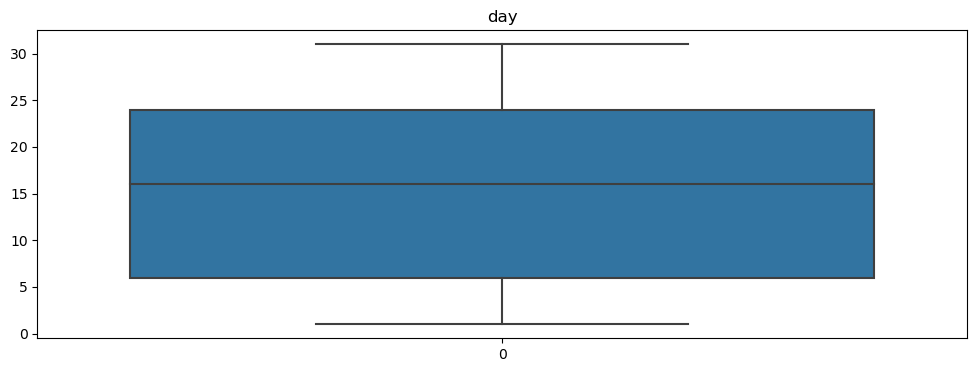

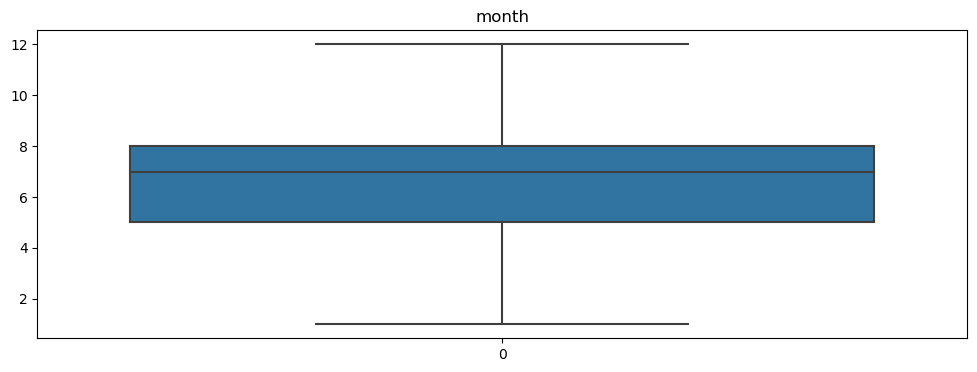

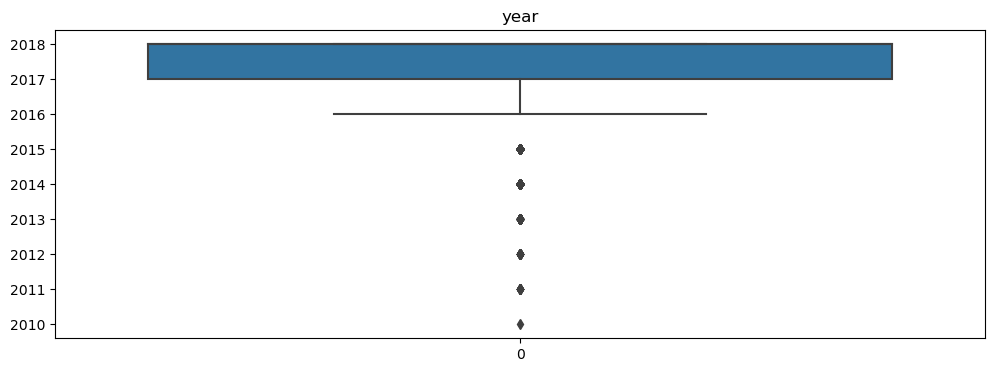

In [41]:
for col in num_df.columns:
    plt.figure(figsize=(12,4))
    sns.boxplot(df[col])
    plt.title(col)

In [42]:
df1 = df.copy()

In [43]:
def remove_outliers_IQR(col):
    percentile25 = df1[col].quantile(0.25)
    percentile75 = df1[col].quantile(0.75)
    print(f"percentile25 = {percentile25}")
    print(f"percentile75 = {percentile75}")
    IQR = percentile75-percentile25
    upper_limit = percentile75 + 1.5*IQR
    lower_limit = percentile25 - 1.5*IQR
    print(f"upper_limit = {upper_limit}")
    print(f"lower_limit = {lower_limit}")
    df1[col] = np.where(df1[col]>upper_limit, upper_limit, np.where(df1[col]<lower_limit, lower_limit, df[col]))
    return df1[df1[col]>upper_limit]

In [44]:
remove_outliers_IQR('size')

percentile25 = 4.9
percentile75 = 30.0
upper_limit = 67.65
lower_limit = -32.75000000000001


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,size,day,month,year


In [45]:
def create_comparison_plot(df,df1,column):
    plt.figure(figsize=(16,8))
    plt.subplot(2,2,1)
    sns.distplot(df[column])
    
    plt.subplot(2,2,2)
    sns.boxplot(df[column])
    
    plt.subplot(2,2,3)
    sns.distplot(df1[column])
    
    plt.subplot(2,2,4)
    sns.boxplot(df1[column])
    
    plt.show()

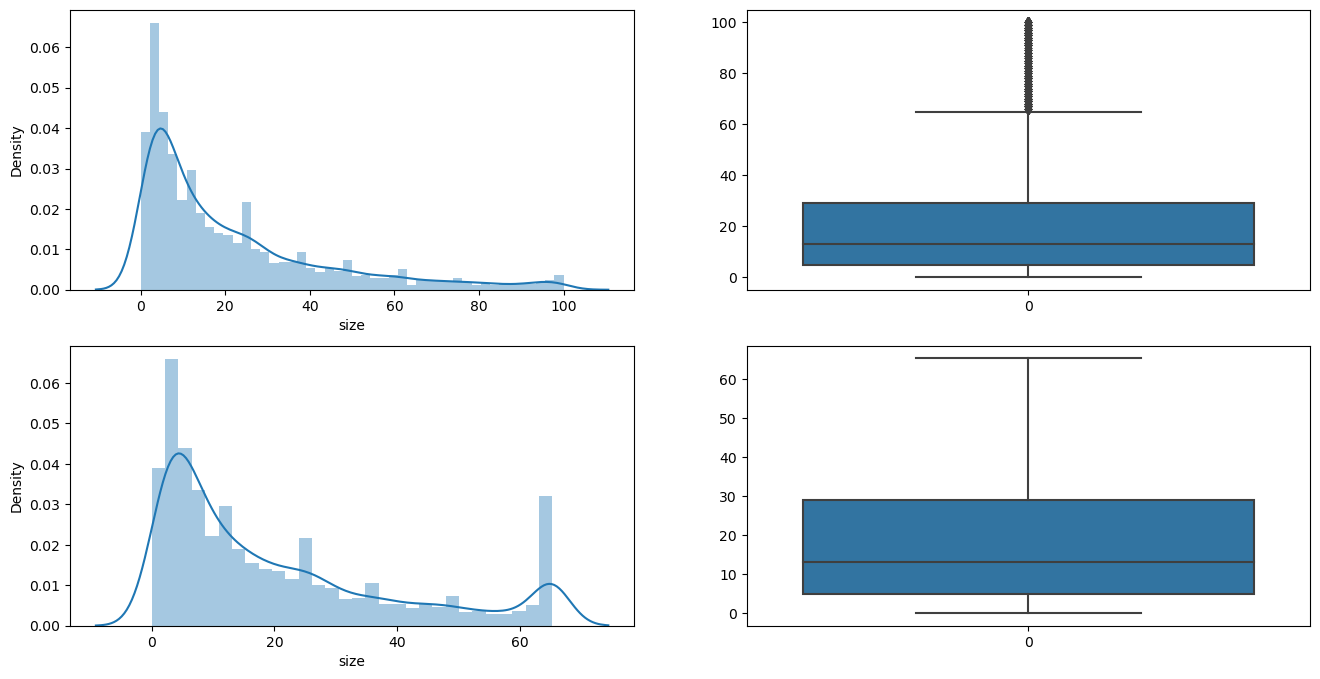

In [15]:
create_comparison_plot(df,df1,'size')


In [46]:
remove_outliers_IQR('Rating')

percentile25 = 4.0
percentile75 = 4.5
upper_limit = 5.25
lower_limit = 3.25


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,size,day,month,year


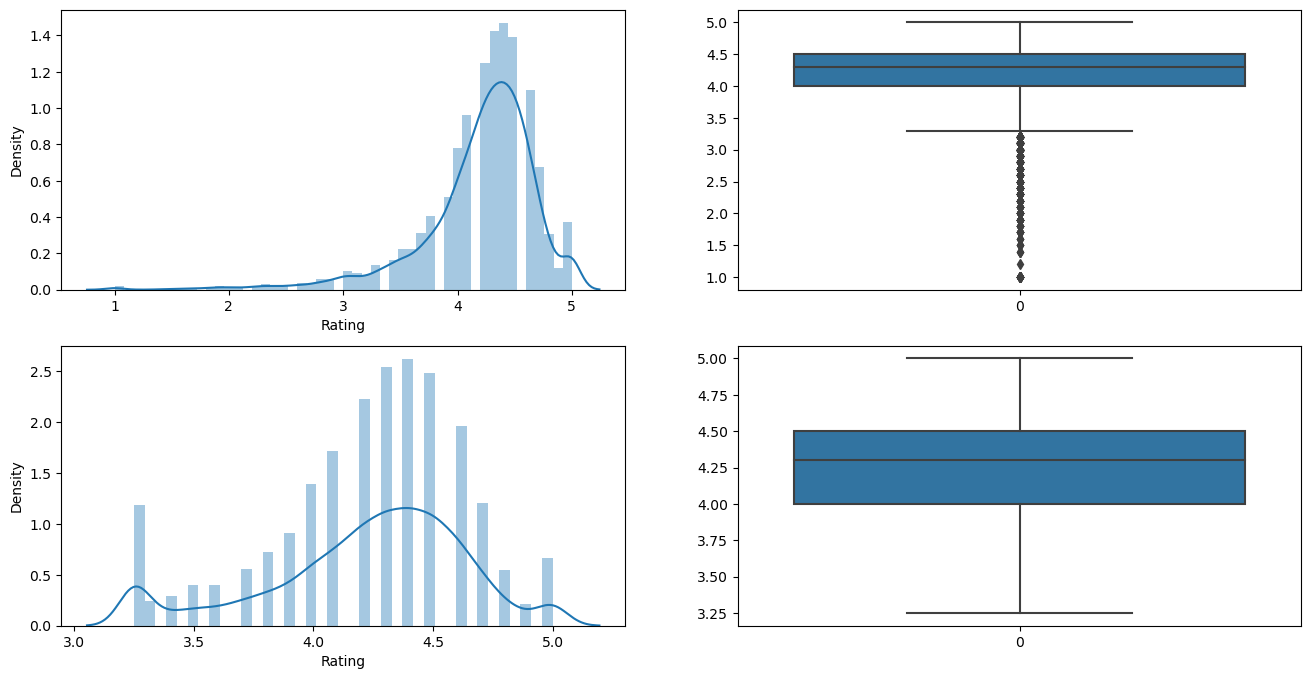

In [47]:
create_comparison_plot(df,df1,'Rating')

In [48]:
remove_outliers_IQR('Reviews')

percentile25 = 38.0
percentile75 = 54644.0
upper_limit = 136553.0
lower_limit = -81871.0


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,size,day,month,year


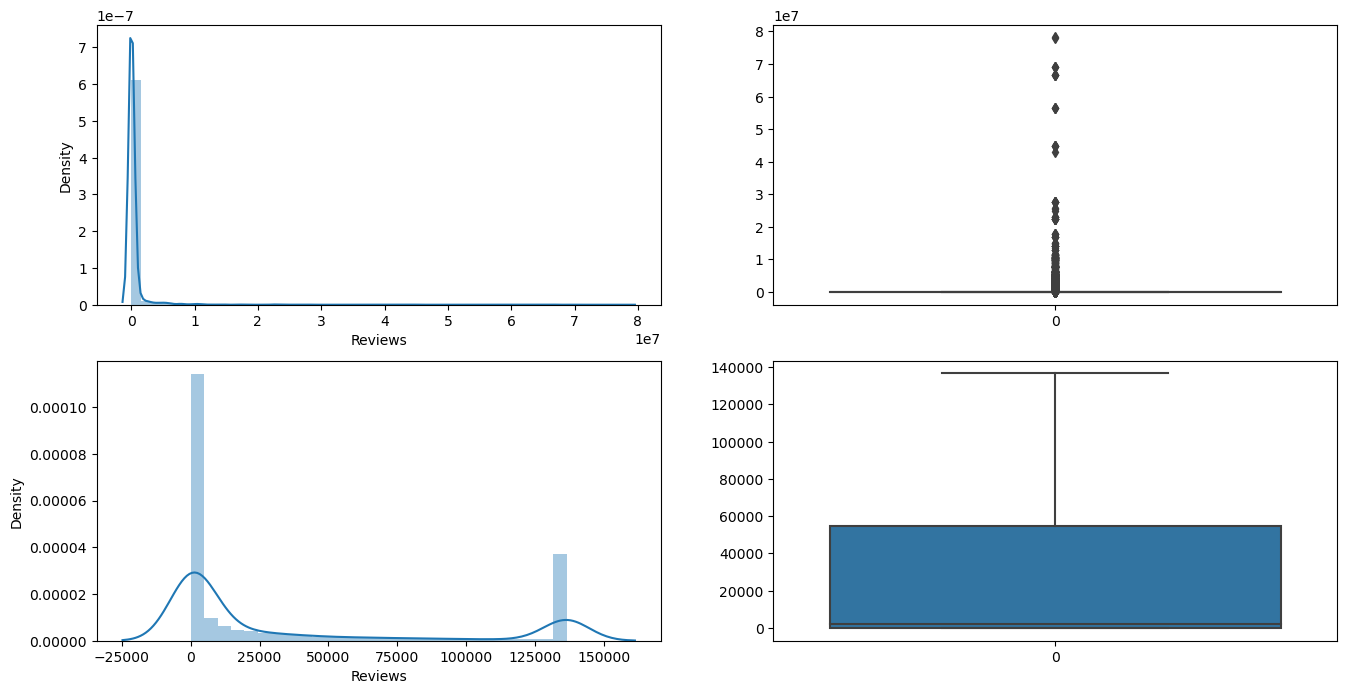

In [49]:
create_comparison_plot(df, df1,'Reviews')

In [50]:
remove_outliers_IQR('Installs')

percentile25 = 1000.0
percentile75 = 5000000.0
upper_limit = 12498500.0
lower_limit = -7497500.0


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,size,day,month,year


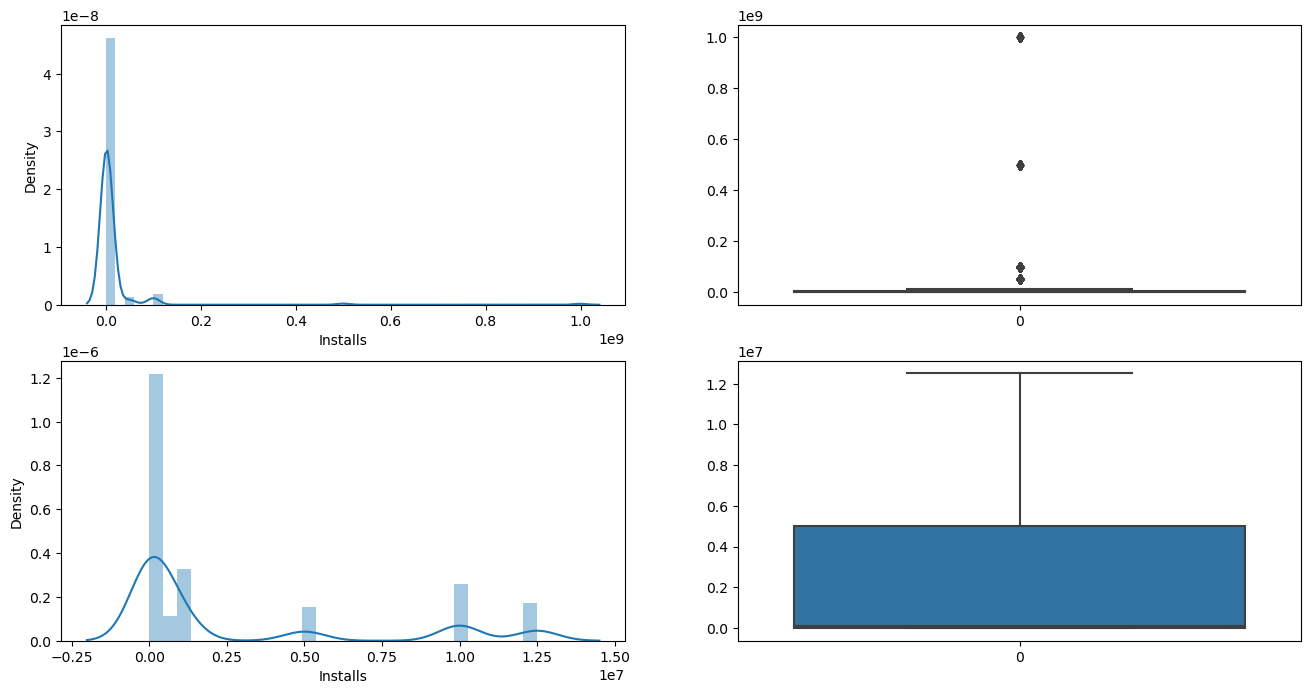

In [51]:
create_comparison_plot(df,df1,'Installs')

In [52]:
remove_outliers_IQR('year')

percentile25 = 2017.0
percentile75 = 2018.0
upper_limit = 2019.5
lower_limit = 2015.5


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,size,day,month,year


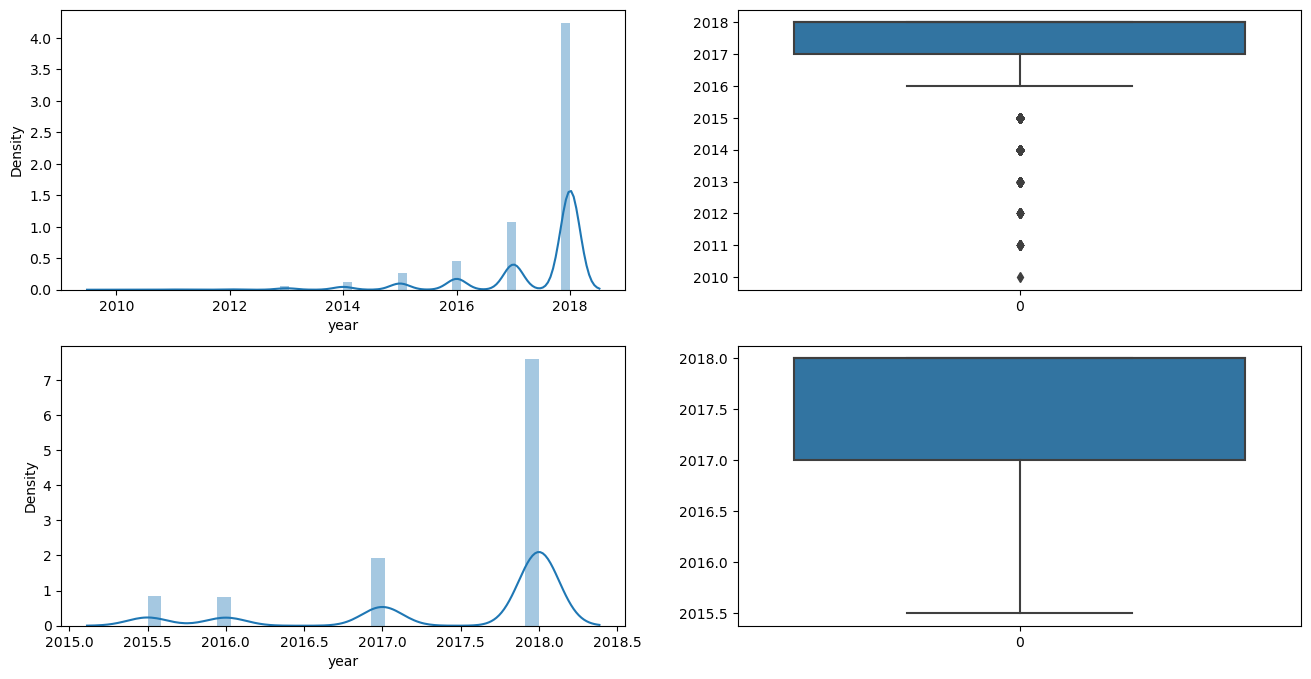

In [53]:
create_comparison_plot(df,df1,'year')

### Compare Skewness

In [54]:
df.skew()

Rating      -1.855924
Reviews     16.448822
Size         1.559040
Installs     9.571613
Price       23.706295
size         1.566197
day         -0.002751
month       -0.114295
year        -2.288146
dtype: float64

In [55]:
df1.skew()

Rating      -0.677038
Reviews      1.197087
Size         1.559040
Installs     1.384821
Price       23.706295
size         1.131534
day         -0.002751
month       -0.114295
year        -1.371806
dtype: float64

#### Insights
- Skewness is reduced after we have removed ouliers using IQR Method

In [56]:
df1.shape

(10839, 17)

In [57]:
df1.to_csv('google_outliers.csv', index=False)